In [85]:
# we used pd.read_csv for accessing our file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(rentfaster (1).csv)

In [86]:
# we can use head function for accessing initial raws so we can take overview of data
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [87]:
# info() function provide detailed information of data such as datatype,nonull value in each column, memory usage and number of entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [88]:
# this function return the number of raw and column
df.shape

(25771, 18)

In [89]:
df.columns

Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

In [90]:
# we just created loop for accessing columns one by one and in loop 
#we used unique and nunique fuctions so we can get what type of unique value we have in each column and number of unique value in each column
count= 0
for column in df.columns:
    unique_value= df[column].unique()
    unique_number=df[column].nunique()
    count+=1
    print(f"{count}. unique value in {column} : {unique_value} \n ")
    print(f"{count}. unique value number in {column} : {unique_number} \n ")
    

1. unique value in rentfaster_id : [468622  92670 565052 ... 334133 334285 334284] 
 
1. unique value number in rentfaster_id : 9614 
 
2. unique value in city : ['Airdrie' 'Aldersyde' 'Balzac' 'Banff' 'Beaumont' 'Beiseker'
 'Black Diamond' 'Blackfalds' 'Bonnyville' 'Bowden' 'Brooks' 'Bruderheim'
 'Calgary' 'Camrose' 'Canmore' 'Carmangay' 'Chestermere' 'Cochrane'
 'Cold Lake' 'Crossfield' 'Crowsnest Pass' 'De Winton' 'Drumheller'
 'Duchess' 'Edmonton' 'Edson' 'Fort McMurray' 'Fort Saskatchewan'
 'Grande Prairie' 'High River' 'Innisfail' 'Lacombe' 'Langdon' 'Leduc'
 'Lethbridge' 'Medicine Hat' 'Morinville' 'Nisku' 'Okotoks' 'Olds'
 'Peace River' 'Ponoka' 'Priddis' 'Red Deer' 'Rocky View' 'Shaughnessy'
 'Sherwood Park' 'Slave Lake' 'Spruce Grove' 'St. Albert' 'St. Paul'
 'Stony Plain' 'Strathmore' 'Sundre' 'Sylvan Lake' 'Wainwright'
 'Westerose' 'Westlock' 'Wetaskiwin' 'Whitecourt' 'Abbotsford' 'Burnaby'
 'Campbell River' 'Chilliwack' 'Colwood' 'Comox' 'Coquitlam' 'Courtenay'
 'Cranbrook

In [91]:
# we dropped unwanted columns so we can do better analysis
df.drop(columns=["rentfaster_id","city","address","latitude","longitude","link","availability_date"],inplace= True)

In [92]:
# we used this function for getting number of null value in each column
df.isnull().sum()

province         0
lease_term      46
type             0
price            0
beds           132
baths          134
sq_feet       4112
furnishing       0
smoking       2702
cats           173
dogs           173
dtype: int64

In [93]:
# our all values have sting formate so we converted it into numeric by using pandas
df["baths"]= pd.to_numeric(df["baths"], errors="coerce")

In [94]:
# from below columns, we dropped raws which hold null value as we can not to analysis with null values 
df.dropna(subset=["lease_term","beds","baths","smoking","cats","dogs","type"],inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 25770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    22864 non-null  object 
 1   lease_term  22864 non-null  object 
 2   type        22864 non-null  object 
 3   price       22864 non-null  float64
 4   beds        22864 non-null  object 
 5   baths       22864 non-null  float64
 6   sq_feet     19431 non-null  object 
 7   furnishing  22864 non-null  object 
 8   smoking     22864 non-null  object 
 9   cats        22864 non-null  object 
 10  dogs        22864 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


In [96]:
# sq_feet column hold all value in sting form so firstly, 
#we removed Sq. Ft. from value and convert string into numeric form by using to_numeric function
df["sq_feet"]= df["sq_feet"].str.replace("Sq. Ft.", " ",regex=False)
df["sq_feet"]=pd.to_numeric(df["sq_feet"], errors = "coerce")
print(df)

           province lease_term       type   price    beds  baths  sq_feet  \
0           Alberta  Long Term  Townhouse  2495.0  2 Beds    2.5   1403.0   
1           Alberta  Long Term  Townhouse  2695.0  3 Beds    2.5   1496.0   
2           Alberta  Long Term  Townhouse  2295.0  2 Beds    2.5   1180.0   
3           Alberta  Long Term  Townhouse  2095.0  2 Beds    2.5   1403.0   
4           Alberta  Long Term  Townhouse  2495.0  2 Beds    2.5   1403.0   
...             ...        ...        ...     ...     ...    ...      ...   
25766  Saskatchewan  Long Term  Apartment   920.0  Studio    1.0    400.0   
25767  Saskatchewan  Long Term  Apartment  1450.0  3 Beds    1.0    810.0   
25768  Saskatchewan  Long Term  Apartment  1125.0   1 Bed    1.0    520.0   
25769  Saskatchewan  Long Term  Apartment   920.0  Studio    1.0    400.0   
25770  Saskatchewan  Long Term  Apartment  1285.0  2 Beds    1.0    700.0   

        furnishing      smoking  cats  dogs  
0      Unfurnished  Non-Smoki

In [97]:
# after converting all value in number form , we replaced null value by mean using fillna function
df["sq_feet"]= df["sq_feet"].fillna(df["sq_feet"].mean())
df["sq_feet"]

0        1403.0
1        1496.0
2        1180.0
3        1403.0
4        1403.0
          ...  
25766     400.0
25767     810.0
25768     520.0
25769     400.0
25770     700.0
Name: sq_feet, Length: 22864, dtype: float64

In [98]:
# mnual mapping for coverting object to numeric value 
province_mapping= {'Alberta': 0,'British Columbia': 1,'Manitoba':2,'New Brunswick':3,'Newfoundland and Labrador':4,'Northwest Territories':5,'Nova Scotia':6,'Ontario':7,'Quebec':8,'Saskatchewan':9}
df["province"]=df["province"].map(province_mapping)


In [99]:
unique_value= df["province"].unique()
unique_value

array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9], dtype=int64)

In [100]:
from sklearn.preprocessing import OrdinalEncoder
# define the order of the lease terms
lease_term_order = ['Negotiable', 'Short Term', '6 months', '12 months', 'months', 'Long Term']

# Create an OrdinalEncorder with the defined order
encoder = OrdinalEncoder(categories=[lease_term_order])
#apply the OrdinalEncorder to the column
df['lease_term'] = encoder.fit_transform(df[['lease_term']])


In [101]:
# define the order of the bed
beds_order = ['1 Bed', '2 Beds', '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds', '9 Beds', 'Studio']

# create ordinal encoder to define order
encoder = OrdinalEncoder(categories=[beds_order])

# reshape the data to fit the encoder and apply the OrdinalEncoder
df['beds'] = encoder.fit_transform(df[['beds']])


In [102]:
# define the mapping for the type column
type_mapping = {
    
    'Townhouse': 0,
    'Apartment': 1,
    'Main Floor': 2,
    'House': 3,
    'Basement': 4,
    'Duplex': 5,
    'Storage': 6,
    'Condo Unit': 7,
    'Room For Rent': 8,
    'Loft': 9,
    'Acreage': 10,
    'Office Space': 11,
    'Parking Spot': 12,
    'Vacation Home': 13,
    'Mobile': 14
}

# map the type column to the defined intiger
df['type'] = df['type'].map(type_mapping)

unique_value = df['type'].unique()
unique_value

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 13, 14], dtype=int64)

In [103]:
# DEFINE THE MAPPING FOR THE FURNISHING COLUMN
furnishing_mapping = {
    'Furnished': 0,
    'Negotiable': 1,
    'Unfurnished': 2,
    'Unfurnished, Negotiable': 3
}
# map the furnishing column to define integer
df['furnishing']= df['furnishing'].map(furnishing_mapping)
        


In [104]:
# degiune the mapping for the smoking column
smoking_mapping = {
    'Negotiable': 0,
    'Non-Smoking': 1,
    'Smoke Free Building': 2,
    'Smoking Allowed': 3
}
# map the smoking column to the define integers
df['smoking']= df['smoking'].map(smoking_mapping)

In [105]:
# define the mapping for the pet allowed column
pets_allowed_mapping = {
    False: 0,
    True: 1
}
# Map the pets allowed column to define the integers
df['dogs']= df['dogs'].map(pets_allowed_mapping)
df['cats']= df['cats'].map(pets_allowed_mapping)

In [106]:
# to get information about data sach as type of column , no-null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 25770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    22864 non-null  int64  
 1   lease_term  22864 non-null  float64
 2   type        22864 non-null  int64  
 3   price       22864 non-null  float64
 4   beds        22864 non-null  float64
 5   baths       22864 non-null  float64
 6   sq_feet     22864 non-null  float64
 7   furnishing  22864 non-null  int64  
 8   smoking     22864 non-null  int64  
 9   cats        22864 non-null  int64  
 10  dogs        22864 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.1 MB


In [107]:
df["type"].unique()

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 13, 14], dtype=int64)

In [108]:
#now we again checked for null value and we don't have any null value so we can go for further step
df.isnull().sum()


province      0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [109]:
# now, we can see that all coulumn have integer or float value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 25770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    22864 non-null  int64  
 1   lease_term  22864 non-null  float64
 2   type        22864 non-null  int64  
 3   price       22864 non-null  float64
 4   beds        22864 non-null  float64
 5   baths       22864 non-null  float64
 6   sq_feet     22864 non-null  float64
 7   furnishing  22864 non-null  int64  
 8   smoking     22864 non-null  int64  
 9   cats        22864 non-null  int64  
 10  dogs        22864 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.1 MB


In [110]:
# we can see min,max, standard diviation , mean and other things by using this function
df.describe ()

,province,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
count,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000,22864.00000,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000
mean,2.600070,4.619096,2.231281,2126.693650,1.364328,1.43317,896.875709,1.797717,1.027379,0.637771,0.609430
std,3.448162,1.293984,2.252963,951.469468,2.097992,0.66811,450.549901,0.588398,0.224944,0.480655,0.487889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,1600.000000,0.000000,1.00000,650.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,2000.000000,1.000000,1.00000,896.875709,2.000000,1.000000,1.000000,1.000000
75%,7.000000,5.000000,3.000000,2500.000000,2.000000,2.00000,986.000000,2.000000,1.000000,1.000000,1.000000
max,9.000000,5.000000,14.000000,29990.000000,9.000000,8.00000,11700.000000,3.000000,3.000000,1.000000,1.000000


### Visualization

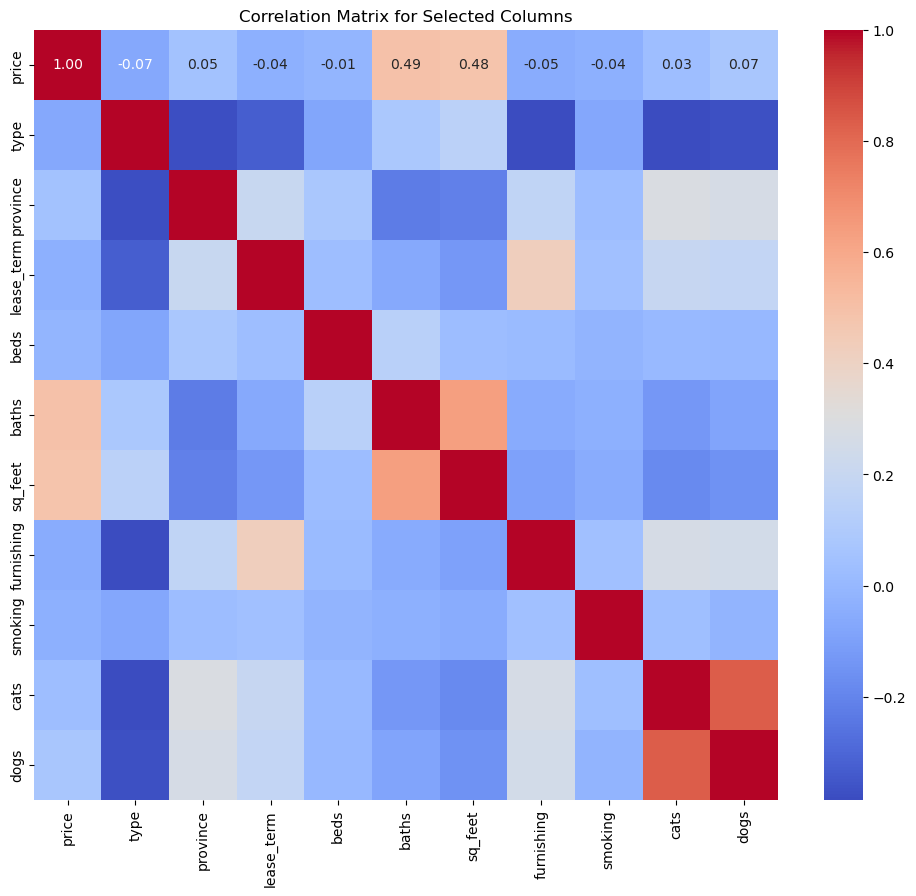

In [111]:

# Define the list of columns to include in the heatmap
columns_of_interest = ['price', 'type', 'province', 'lease_term', 'beds', 'baths', 'sq_feet', 'furnishing', 'smoking', 'cats', 'dogs']

# Select the subset of columns
df_subset = df[columns_of_interest]

# Create and display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_subset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Columns')
plt.show()


### visualization

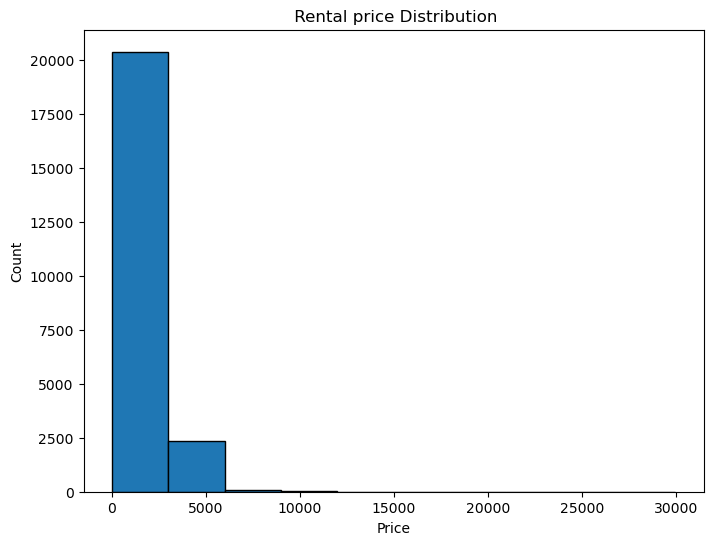

In [112]:
import matplotlib.pyplot as plt
# using histogram for more visualisation
plt.figure(figsize=(8,6))
plt.hist(df['price'],bins=10, edgecolor='black')
# adding title and label for the histogram
plt.title(" Rental price Distribution")
plt.xlabel('Price')
plt.ylabel('Count')
# displaying the histogram
plt.show()


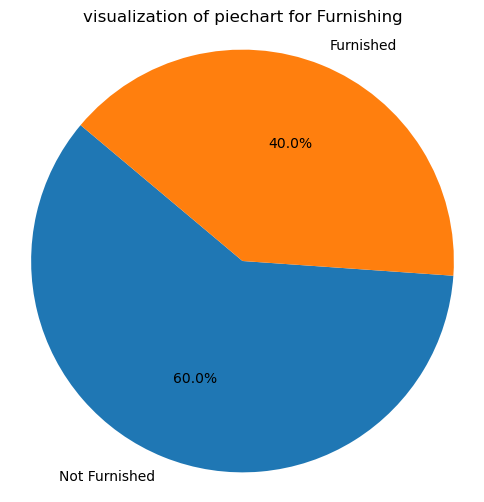

In [113]:
# data for pie chart 
furn_count=[60,40] #no. of properties : not furnished-60,furnished-40
labels=['Not Furnished','Furnished']
# creating pie chart
plt.figure(figsize=(6,6))
plt.pie(furn_count,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title( 'visualization of piechart for Furnishing')
plt.axis('equal')    # equal here shows that pie is drwan as a circle
plt.show()

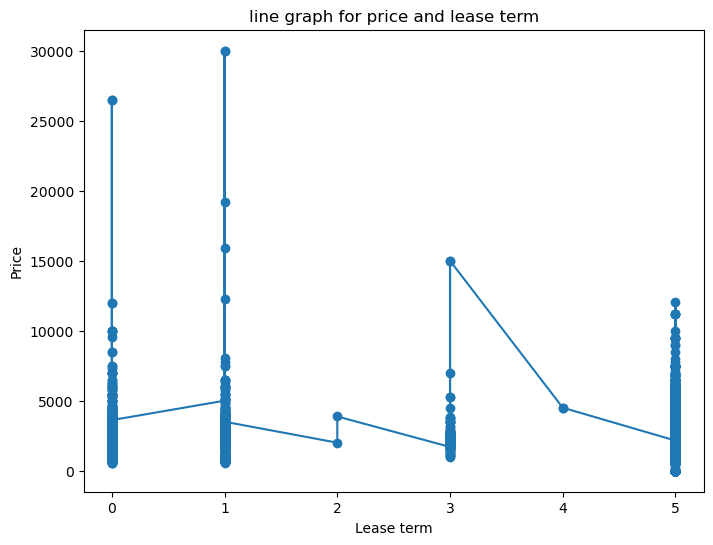

In [114]:
# sorting df by lease term
val= df.sort_values(by="lease_term")
# creating line graph
plt.figure(figsize=(8,6))
plt.plot(val['lease_term'],val['price'],marker='o',label='price')
# adding title and labels to the graph
plt.title("line graph for price and lease term")
plt.xlabel("Lease term")
plt.ylabel("Price")
# showing the plot
plt.show()


C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

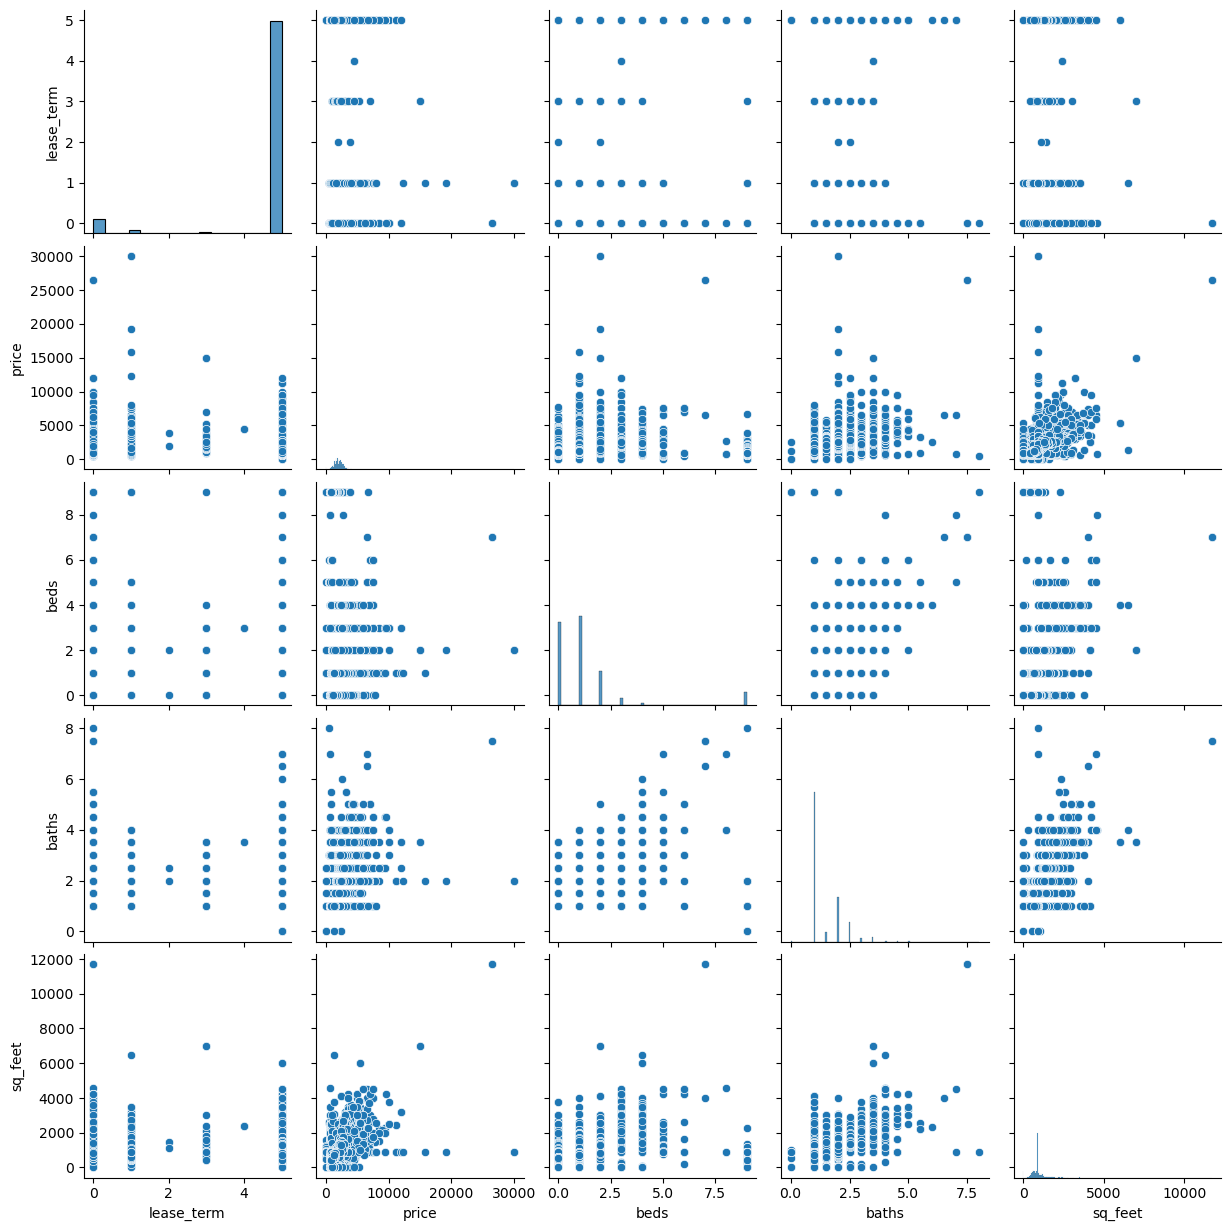

In [115]:
# creating a pairplot 
import seaborn as sns
# using numerical columns in df
num_col=df.select_dtypes(include=['int32','float64'])
sns.pairplot(num_col)

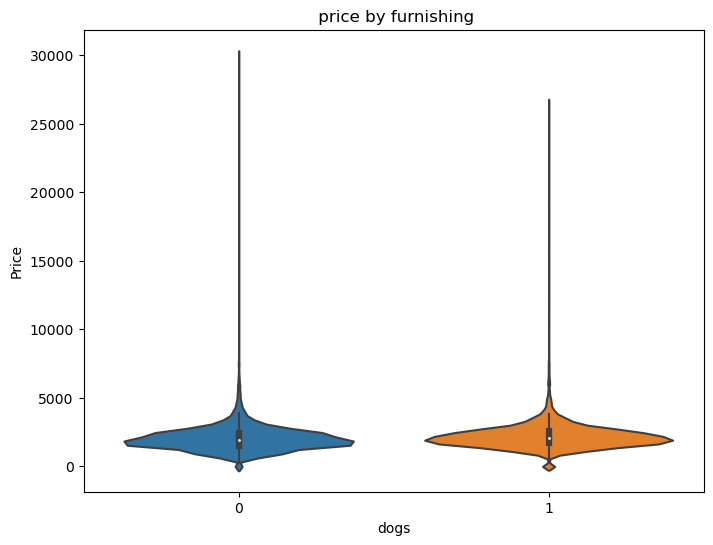

In [116]:
# creating a violin plot 
import seaborn as sns
plt.figure(figsize=(8,6))
sns.violinplot(x='dogs',y='price',data=df)
# adding title and labels to the plot
plt.title(" price by furnishing")
plt.xlabel("dogs")
plt.ylabel("Price")
# showing the plot
plt.show()

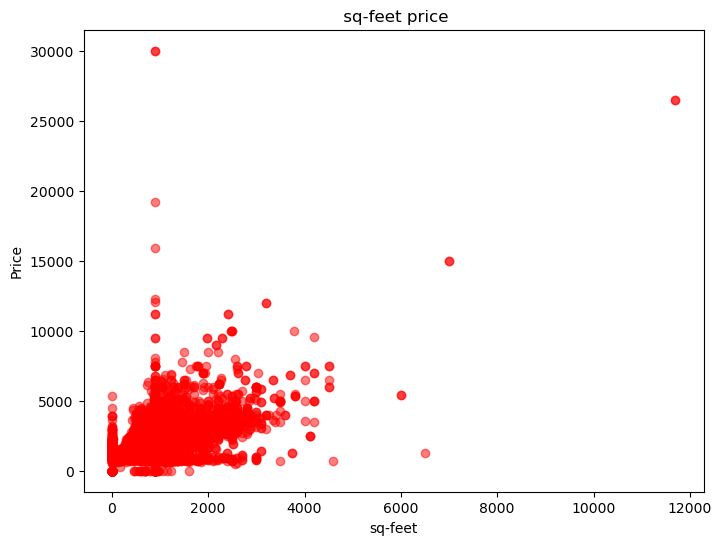

In [117]:
# creating scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['sq_feet'],df['price'],color='r',alpha=0.5,label='baths')
# adding titile and lables for the plot 
plt.title(" sq-feet price")
plt.xlabel("sq-feet")
plt.ylabel("Price")
# showing the plot
plt.show()

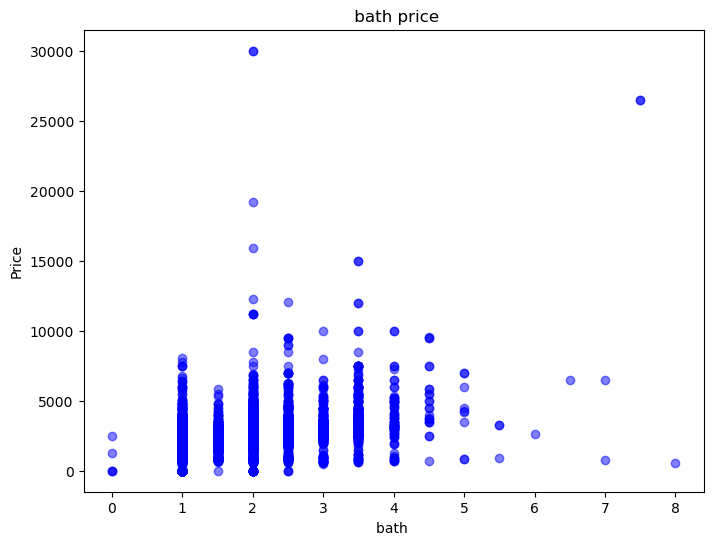

In [118]:
# creating another scatter plot for better visualization
plt.figure(figsize=(8,6))
plt.scatter(df['baths'],df['price'],color='b',alpha=0.5,label='baths')
# adding title and labels for the plot 
plt.title(" bath price")
plt.xlabel("bath ")
plt.ylabel("Price")
# showing the plot
plt.show()

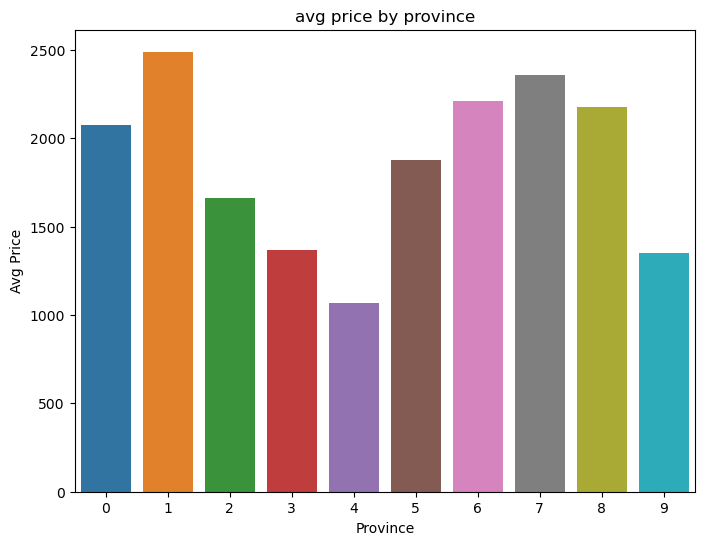

In [119]:
# creating a barplot 
#calculating average of price on the basis of province 
avg_price_province=df.groupby("province")['price'].mean().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_province.index,y=avg_price_province.values,data=df)
# adding title and labels in plot 
plt.title("avg price by province")
plt.xlabel("Province")
plt.ylabel("Avg Price")
#showing the plot 
plt.show()

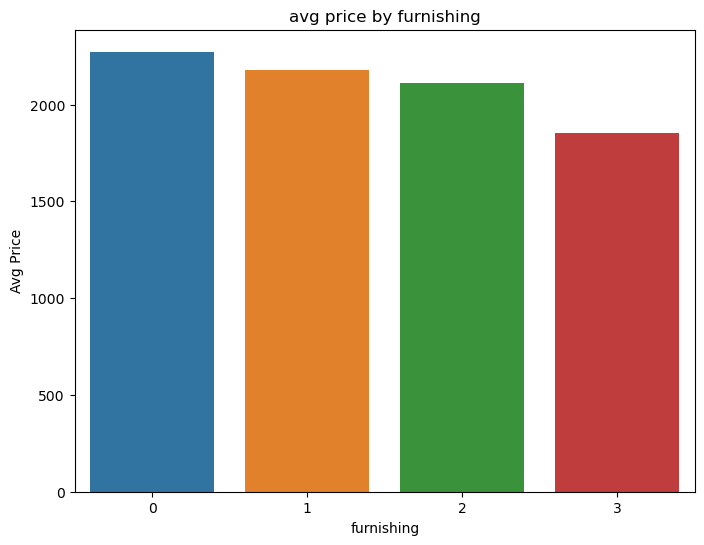

In [120]:
# creating a barplot 
#calculating average of price on the basis of FURNISHING
avg_price_province=df.groupby("furnishing")['price'].mean().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_province.index,y=avg_price_province.values,data=df)
# INSERT TITLE and labels
plt.title("avg price by furnishing")
plt.xlabel("furnishing")
plt.ylabel("Avg Price")
plt.show()

C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajpa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


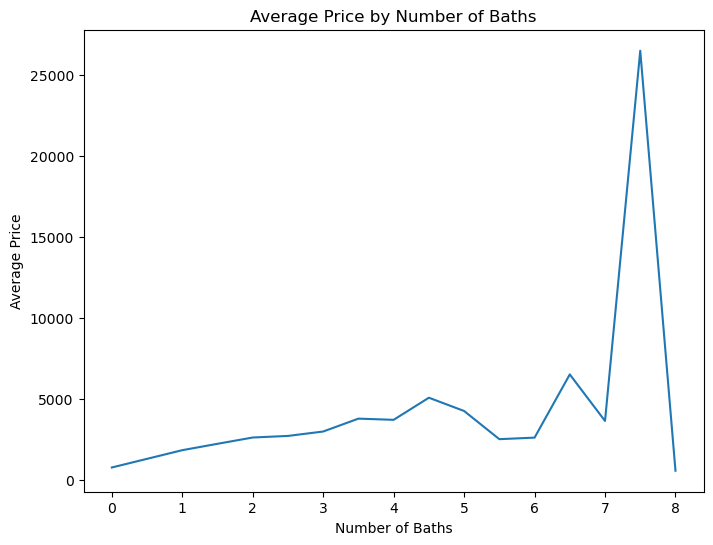

In [121]:
avg_price_baths = df.groupby("baths")['price'].mean().sort_values()
plt.figure(figsize=(8,6))
sns.lineplot(x=avg_price_baths.index, y=avg_price_baths.values)
# adding title and labels for the plot
plt.title("Average Price by Number of Baths")
plt.xlabel("Number of Baths")
plt.ylabel("Average Price")
#displaying the plot
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 25770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    22864 non-null  int64  
 1   lease_term  22864 non-null  float64
 2   type        22864 non-null  int64  
 3   price       22864 non-null  float64
 4   beds        22864 non-null  float64
 5   baths       22864 non-null  float64
 6   sq_feet     22864 non-null  float64
 7   furnishing  22864 non-null  int64  
 8   smoking     22864 non-null  int64  
 9   cats        22864 non-null  int64  
 10  dogs        22864 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.1 MB


### Linear Regression

In [123]:
class LinearRegressionModel:
    def __init__(self,data):  # initalising linear model with data 
        self.data= data
        self.model=LinearRegression()
        self.X_train, self.X_test,self.y_train,self.y_test=self.split()
        self.train()
    def split(self):  # make method for splting the data
        X=self.data.drop('price',axis=1)
        y=self.data['price']
        return train_test_split(X,y,test_size=0.2,random_state=42)
    def train(self): # now mcreating method for training the model
        self.model.fit(self.X_train,self.y_train)
    def evaluate(self):
        y_pred=self.model.predict(self.X_test)
        mse=mean_squared_error(self.y_test,y_pred) 
        r2=r2_score(self.y_test,y_pred)
        return mse,r2
    
linear_regression= LinearRegressionModel(df) # creating object for acessing the class 
mse_1,r2_1= linear_regression.evaluate()
print(f" Mean Squared Error is:{mse_1}") 
print(f"R^2 Score is:{r2_1}")

 Mean Squared Error is:596439.1925011259
R^2 Score is:0.3694451245532596


### Random Forest Regression

In [124]:
# preprocessing for numerical data
numerical_features = X.columns
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# create a pipeline with preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', RandomForestRegressor())])

# define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# perform GridSearchCV too find the best parameter
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# getting the best model
best_model= grid_search.best_estimator_

# making the prediction on the test set
y_pred = best_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)

NameError: name 'X' is not defined

### Gradient Boosting Regression  model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
#model training
gb_reg.fit(X_train,y_train)
#doing predictions
y_pred=gb_reg.predict(X_test)
#model evaluation
mse_g = mean_squared_error(y_test, y_pred)
r2_g = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_g:.2f}")
print(f"R-squared: {r2_g:.2f}")

In [ ]:
import matplotlib.pyplot as plt
# using scatter plot for elucidating visualization 
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_linear,color='blue',alpha=0.5)
#ploting diagonal line for good prediction(y=x)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--')
#adding title and labels 
plt.title('Predicted vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted value')
#showing the plot
plt.show()